# Evolution on rugged adaptive landscapes
## Obolski, Ram & Hadany
## Key Issues Review for Reports on Progress in Physics, 2017

This notebook contains text and Python code as the supporting material for

> Obolski, Ram & Hadany (2017) Evolution on rugged adaptive landscapes, Reports on Progress in Physics.

The most updated version of this notebook is on [GitHub](https://github.com/yoavram/UnderTheRug).

To run the notebook you will need Python (v.3.5), Jupyter notebook (v.4.3), NumPy (v1.11), Matplotlib (v.2.0), Seaborn (v.0.7), and Cython (v.0.25); see the [README](https://github.com/yoavram/UnderTheRug/blob/master/README.md) for more instructions.

# Notebook 3: Holey landscapes

The notebook includes code to generate random "holey landscapes" and visualize these landscapes.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import pandas as pd
import seaborn as sns
sns.set(
    style='ticks',
    context='paper',
    font_scale=2
)

red = sns.color_palette('Reds',255)[-1]
blue = sns.color_palette('Blues',255)[-1]

In [2]:
def show(m, cmap='viridis'):
    plt.matshow(m, cmap=cmap)
    plt.xticks([])
    plt.yticks([])

In [3]:
n = 10
d = 2
p = 0.2

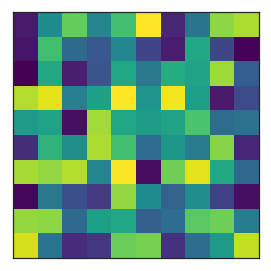

In [4]:
shape = (n,) * d
r = np.random.rand(*shape)
show(r)

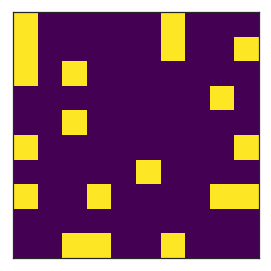

In [5]:
m = r < 0.2
show(m)

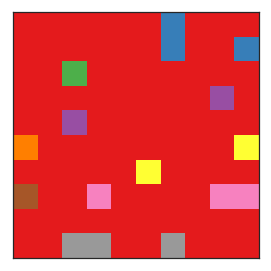

In [6]:
labels, k = ndimage.label(m)
show(labels, cmap='Set1')

In [7]:
biggest = max((labels==lbl).sum() for lbl in range(1, k))
biggest

3

In [8]:
def biggest_component(n, d, p):
    shape = (n,) * d
    m = np.random.rand(*shape)
    m = m < p
    m, k = ndimage.label(m)
    if k < 2:
        return 0
    return max((m == lbl).sum() for lbl in range(1, k)) / m.size

biggest_component(n, d, p)

0.040000000000000001

In [9]:
n = 30
d = 3
ps  = np.linspace(0.1, 0.5, 50)
nsamples = 10
biggest = [
    [
        biggest_component(n, d, p) 
        for _ in range(nsamples)
    ]
    for p in ps
]

In [10]:
df = pd.DataFrame(biggest)
df['p'] = ps
df = pd.melt(df, id_vars='p', var_name='sample', value_name='max size')
df.head()

,p,sample,max size
0,0.100000,0,0.000370
1,0.108163,0,0.000444
2,0.116327,0,0.000444
3,0.124490,0,0.000630
4,0.132653,0,0.000556


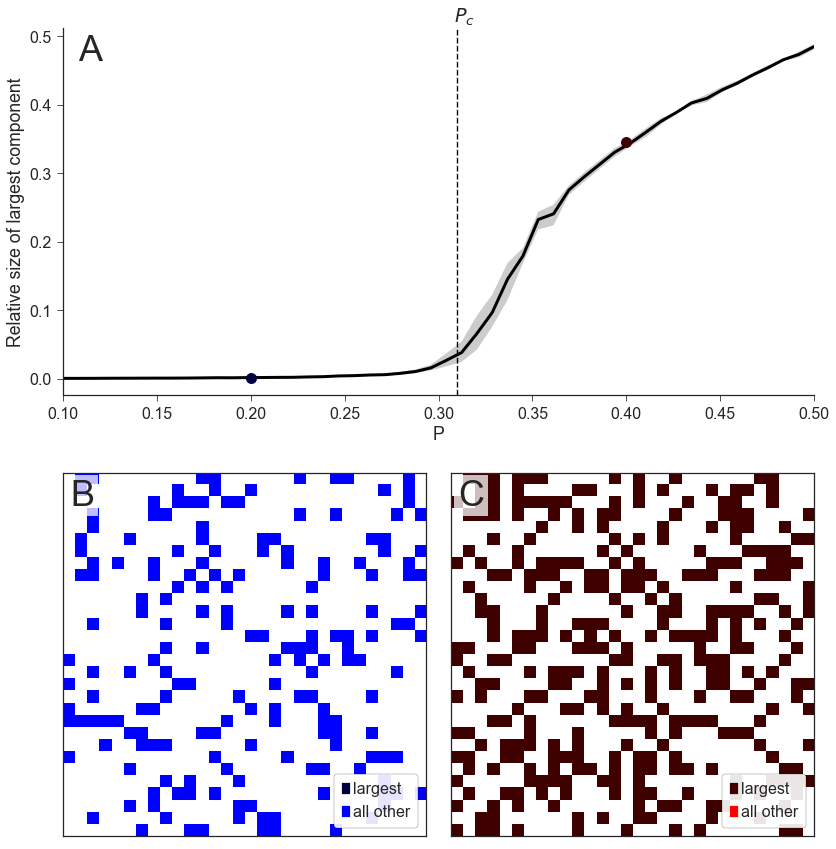

In [13]:
fig = plt.figure(figsize=(12, 12)) 
gs = mpl.gridspec.GridSpec(nrows=2, ncols=2)

reds = [(1,1,1), (1, 0, 0), (0.25, 0, 0)]
red_cm = mpl.colors.LinearSegmentedColormap.from_list(
        'red_cm', colors=reds)
blues = [(1,1,1), (0, 0, 1), (0, 0, 0.25)]
blue_cm = mpl.colors.LinearSegmentedColormap.from_list(
        'blue_cm', colors=blues)

ax0 = plt.subplot(gs[0, :])
ax1 = plt.subplot(gs[1, 0])
ax2 = plt.subplot(gs[1, 1])
p1 = 0.2
p2 = 0.4

sns.tsplot(df, time='p', unit='sample', value='max size', ci=99,
           color='k', lw=3, ax=ax0)
ax0.plot(p1, 0.001, 'o', color=blues[2], markersize=11)
ax0.plot(p2, 0.345, 'o', color=reds[2], markersize=11)

ax0.axvline(0.31, color='k', ls='--')
ax0.text(0.308, 0.52, '$P_c$')
ax0.set(
    xlabel=('P'),
    ylabel=('Relative size of largest component')
)

shape = (n,) * d
m = np.random.rand(*shape)
m = m < p1
labels, k = ndimage.label(m)
largest_comp = max(range(1,k), key=lambda i: (labels==i).sum())
labels[(labels>0) & (labels!=largest_comp)] = 1
labels[labels==largest_comp] = 2
ax1.matshow(labels[0], cmap=blue_cm, vmin=0, vmax=2)
patches = [ 
    mpl.patches.Patch(color=blues[2], label="largest"),
    mpl.patches.Patch(color=blues[1], label="all other")
]
ax1.legend(handles=patches, frameon=True, fancybox=True, loc='lower right', 
           borderpad=0.5, edgecolor='k', framealpha=0.9, 
           handlelength=0.5, handletextpad=0.2)
ax1.set(
    xticks=[], yticks=[]
)
m = np.random.rand(*shape)
m = m < p2
labels, k = ndimage.label(m)
largest_comp = max(range(1,k), key=lambda i: (labels==i).sum())
labels[(labels>0) & (labels!=largest_comp)] = 1
labels[labels==largest_comp] = 2
ax2.matshow(labels[0], cmap=red_cm , vmin=0, vmax=2)
patches = [ 
    mpl.patches.Patch(color=reds[2], label="largest"),
    mpl.patches.Patch(color=reds[1], label="all other")
]
ax2.legend(handles=patches, frameon=True, fancybox=True, loc='lower right', 
           borderpad=0.5, edgecolor='k', framealpha=0.9, handlelength=0.5, handletextpad=0.2)
ax2.set(
    xticks=[], yticks=[]
)

for ax, letter in zip([ax0, ax1, ax2], 'ABCDEFG'):
    ax.annotate(letter, xy=(0.02, 0.91), xycoords='axes fraction', fontsize=36, bbox=dict(fc="w", lw=0, alpha=0.75))

fig.tight_layout() 
sns.despine(ax=ax0)
fig.savefig('holey_landscape.tif', dpi=300, papertype='a4')

# License

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.